<a href="https://colab.research.google.com/github/Hooded-dev/Word2Vec_Implementation/blob/master/LSTM_NMT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import string
import numpy as np
import pandas as pd
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Model
from keras.layers import LSTM, Input, TimeDistributed, Dense, Activation, RepeatVector, Embedding
from tensorflow.keras.optimizers import Adam # - Works
from keras.losses import sparse_categorical_crossentropy

In [2]:
urdu_file = '/content/Bible-UR'
translation_file = open(urdu_file,"r", encoding='utf-8') 
urdu_data = translation_file.read()
translation_file.close()

In [3]:
eng_file = '/content/Bible-EN'
translation_file = open(eng_file,"r", encoding='utf-8') 
eng_data = translation_file.read()
translation_file.close()

In [4]:
eng_data

"\ufeffThe book of the generation of Jesus Christ , the son of David , the son of Abraham .\nAbraham begat Isaac ; and Isaac begat Jacob ; and Jacob begat Judas and his brethren .\nAnd Judas begat Phares and Zara of Thamar ; and Phares begat Esrom ; and Esrom begat Aram .\nAnd Aram begat Aminadab ; and Aminadab begat Naasson ; and Naasson begat Salmon .\nAnd Salmon begat Booz of Rachab ; and Booz begat Obed of Ruth ; and Obed begat Jesse .\nAnd Jesse begat David the king ; and David the king begat Solomon of her that had been the wife of Urias .\nAnd Solomon begat Roboam ; and Roboam begat Abia ; and Abia begat Asa .\nAnd Asa begat Josaphat ; and Josaphat begat Joram ; and Joram begat Ozias .\nAnd Ozias begat Joatham ; and Joatham begat Achaz ; and Achaz begat Ezekias .\nAnd Ezekias begat Manasses ; and Manasses begat Amon ; and Amon begat Josias .\nAnd Josias begat Jechonias and his brethren , about the time they were carried away to Babylon .\nAnd after they were brought to Babylon ,

In [5]:
urdu_data

'\ufeffیسُوع مسیح ابن داود ابن ابرہام کا نسب نامہ\nابراہام سے اِضحاق پیدا ہُوا اور اِضحاق سے یعقوب پیدا ہُوا اور یعقوب سے یہوداہ اور اس کے بھائی پیدا ہوئے ۔\nاور یہوداہ سے فارص اور زارح تمر سے پیدا ہوئے اور فارص سے حصرون پیدا ہُوا اور حصرون سے رام پیدا ہُوا ۔\nاور رام سے عمینداب پیدا ہُوا اور عمینداب سے نحسون پیدا ہُوا اور نحسون سے سلمون پیدا ہُوا ۔\nاور سلمون سے بوعز راحب سے پیدا ہُوا اور بوعز سے عوبید رُوت سے پیدا ہُوا اور عوبید سے یسّی پیدا ہُوا ۔\nاور یسّی سے داود بادشاہ پیدا ہُوا ۔ اور داود سے سلیمان اُس عورت سے پیدا ہُوا جو پہلے اُوریاہ کی بیوی تھی ۔\nاور سلیمان سے رحُبِعام پیدا ہُوا اور رحُبِعام سے ابیاہ پیدا ہُوا اور ابیاہ سے آسا پیدا ہُوا ۔\nاور آسا سے یہُوسفط پیدا ہُوا اور یہُوسفط سے یُورام پیدا ہُوا اور یُورام سے عُزّیاہ پیدا ہُوا ۔\nاور عُزّیاہ سے یُوتام پیدا ہُوا اور یُوتام سے آخز پیدا ہُوا اور آخز سےحِزقیاہ پیدا ہُوا ۔\nاور حِزقیا سے منسّی پیدا ہُوا اور منسّی سے امُون پیدا ہُوا اور امُون سے یُوسیاہ پیدا ہُوا ۔\nاور گرفتار ہوکر بابُل جانے کے زمانے میں یُوسیاہ سے یکُونیاہ ا

In [6]:
def clean_sentence(sentence):
    # Lower case the sentence
    lower_case_sent = sentence.lower()
    # Strip punctuation
    string_punctuation = string.punctuation + "¡" + '¿'+','
    clean_sentence = lower_case_sent.translate(str.maketrans('', '', string_punctuation))
   
    return clean_sentence

In [7]:
def tokenize(sentences):
    # Create tokenizer
    text_tokenizer = Tokenizer()
    # Fit texts
    text_tokenizer.fit_on_texts(sentences)
    return text_tokenizer.texts_to_sequences(sentences), text_tokenizer

In [8]:
english_sentences = clean_sentence(eng_data)
urdu_sentences = clean_sentence(urdu_data)

In [11]:
english_sentences

'\ufeffthe book of the generation of jesus christ  the son of david  the son of abraham \nabraham begat isaac  and isaac begat jacob  and jacob begat judas and his brethren \nand judas begat phares and zara of thamar  and phares begat esrom  and esrom begat aram \nand aram begat aminadab  and aminadab begat naasson  and naasson begat salmon \nand salmon begat booz of rachab  and booz begat obed of ruth  and obed begat jesse \nand jesse begat david the king  and david the king begat solomon of her that had been the wife of urias \nand solomon begat roboam  and roboam begat abia  and abia begat asa \nand asa begat josaphat  and josaphat begat joram  and joram begat ozias \nand ozias begat joatham  and joatham begat achaz  and achaz begat ezekias \nand ezekias begat manasses  and manasses begat amon  and amon begat josias \nand josias begat jechonias and his brethren  about the time they were carried away to babylon \nand after they were brought to babylon  jechonias begat salathiel  and 

In [12]:
urdu_text_tokenized, urdu_text_tokenizer = tokenize(urdu_sentences)
eng_text_tokenized, eng_text_tokenizer = tokenize(english_sentences)
print('Maximum length urduntence: {}'.format(len(max(urdu_text_tokenized,key=len))))
print('Maximum length english sentence: {}'.format(len(max(eng_text_tokenized,key=len))))
urdu_vocab = len(urdu_text_tokenizer.word_index) + 1
english_vocab = len(eng_text_tokenizer.word_index) + 1
print("urdu vocabulary is of {} unique words".format(urdu_vocab))
print("English vocabulary is of {} unique words".format(english_vocab))

Maximum length urduntence: 1
Maximum length english sentence: 1
urdu vocabulary is of 56 unique words
English vocabulary is of 28 unique words


In [13]:
max_urdu_len = int(len(max(urdu_text_tokenized,key=len)))
max_english_len = int(len(max(eng_text_tokenized,key=len)))

urdu_pad_sentence = pad_sequences(urdu_text_tokenized, max_urdu_len, padding = "post")
eng_pad_sentence = pad_sequences(eng_text_tokenized, max_english_len, padding = "post")

# Reshape data
urdu_pad_sentence = urdu_pad_sentence.reshape(*urdu_pad_sentence.shape, 1)
eng_pad_sentence = eng_pad_sentence.reshape(*eng_pad_sentence.shape, 1)

In [14]:
input_sequence = Input(shape=(max_urdu_len,))
embedding = Embedding(input_dim=urdu_vocab, output_dim=128,)(input_sequence)

In [15]:
input_sequence = Input(shape=(max_urdu_len,))
embedding = Embedding(input_dim=urdu_vocab, output_dim=128,)(input_sequence)
encoder = LSTM(64, return_sequences=False)(embedding)

In [16]:
input_sequence = Input(shape=(max_urdu_len,))
embedding = Embedding(input_dim=urdu_vocab, output_dim=128,)(input_sequence)
encoder = LSTM(64, return_sequences=False)(embedding)
r_vec = RepeatVector(max_english_len)(encoder)

In [17]:
input_sequence = Input(shape=(max_urdu_len,))
embedding = Embedding(input_dim=urdu_vocab, output_dim=128,)(input_sequence)
encoder = LSTM(64, return_sequences=False)(embedding)
r_vec = RepeatVector(max_english_len)(encoder)
decoder = LSTM(64, return_sequences=True, dropout=0.2)(r_vec)

In [18]:
input_sequence = Input(shape=(max_urdu_len,))
embedding = Embedding(input_dim=urdu_vocab, output_dim=128,)(input_sequence)
encoder = LSTM(64, return_sequences=False)(embedding)
r_vec = RepeatVector(max_english_len)(encoder)
decoder = LSTM(64, return_sequences=True, dropout=0.2)(r_vec)
logits = TimeDistributed(Dense(english_vocab))(decoder)

In [19]:
enc_dec_model = Model(input_sequence, Activation('softmax')(logits))
enc_dec_model.compile(loss=sparse_categorical_crossentropy,
              optimizer=Adam(1e-3),
              metrics=['accuracy'])
enc_dec_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1)]               0         
                                                                 
 embedding_4 (Embedding)     (None, 1, 128)            7168      
                                                                 
 lstm_4 (LSTM)               (None, 64)                49408     
                                                                 
 repeat_vector_2 (RepeatVect  (None, 1, 64)            0         
 or)                                                             
                                                                 
 lstm_5 (LSTM)               (None, 1, 64)             33024     
                                                                 
 time_distributed (TimeDistr  (None, 1, 28)            1820      
 ibuted)                                                     

In [20]:
type(urdu_pad_sentence)

numpy.ndarray

In [21]:
urdu_pad_sentence.shape

(901792, 1, 1)

In [22]:
eng_pad_sentence.shape

(949765, 1, 1)

In [23]:
eng_pad_sentences = eng_pad_sentence[:-47973, :]

In [24]:
eng_pad_sentences.shape

(901792, 1, 1)

In [25]:
model_results = enc_dec_model.fit(urdu_pad_sentence,eng_pad_sentences, batch_size=512, epochs=10)

Epoch 1/10
1762/1762 [==============================] - 33s 17ms/step - loss: 2.7760 - accuracy: 0.2216
Epoch 2/10
1762/1762 [==============================] - 29s 16ms/step - loss: 2.7612 - accuracy: 0.2217
Epoch 3/10
1762/1762 [==============================] - 29s 16ms/step - loss: 2.7610 - accuracy: 0.2217
Epoch 4/10
1762/1762 [==============================] - 29s 16ms/step - loss: 2.7608 - accuracy: 0.2217
Epoch 5/10
1762/1762 [==============================] - 29s 17ms/step - loss: 2.7607 - accuracy: 0.2217
Epoch 6/10
1762/1762 [==============================] - 29s 17ms/step - loss: 2.7607 - accuracy: 0.2217
Epoch 7/10
1762/1762 [==============================] - 29s 17ms/step - loss: 2.7606 - accuracy: 0.2217
Epoch 8/10
1762/1762 [==============================] - 30s 17ms/step - loss: 2.7605 - accuracy: 0.2217
Epoch 9/10
1762/1762 [==============================] - 30s 17ms/step - loss: 2.7605 - accuracy: 0.2217
Epoch 10/10
1762/1762 [==============================] - 29s 16m

In [26]:
def logits_to_sentence(logits, tokenizer):

    index_to_words = {idx: word for word, idx in tokenizer.word_index.items()}
    index_to_words[0] = '<empty>' 

    return ' '.join([index_to_words[prediction] for prediction in np.argmax(logits, 1)])

index = 10
print("The english sentence is: {}".format(english_sentences[index]))
print("The spanish sentence is: {}".format(urdu_sentences[index]))
print('The predicted sentence is :')
print(logits_to_sentence(enc_dec_model.predict(urdu_pad_sentence[index:index+1])[0], eng_text_tokenizer))


The english sentence is: o
The spanish sentence is: ح
The predicted sentence is :
<empty>


In [69]:
#Import Libraries
import os,sys
from keras.models import Model
from keras.layers import Input, LSTM, GRU, Dense, Embedding
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt

#Values for different parameters:
BATCH_SIZE=64
EPOCHS=20
LSTM_NODES=256
NUM_SENTENCES=20000
MAX_SENTENCE_LENGTH=50
MAX_NUM_WORDS=20000
EMBEDDING_SIZE=200

In [70]:
len(english_sentences)

949765

In [76]:
len(urdu_sentences)

901792

In [77]:
Eng_sentences = english_sentences[:900000]
Urdu_sentences = urdu_sentences[:900000]

In [83]:
Eng_sentences

'\ufeffthe book of the generation of jesus christ  the son of david  the son of abraham \nabraham begat isaac  and isaac begat jacob  and jacob begat judas and his brethren \nand judas begat phares and zara of thamar  and phares begat esrom  and esrom begat aram \nand aram begat aminadab  and aminadab begat naasson  and naasson begat salmon \nand salmon begat booz of rachab  and booz begat obed of ruth  and obed begat jesse \nand jesse begat david the king  and david the king begat solomon of her that had been the wife of urias \nand solomon begat roboam  and roboam begat abia  and abia begat asa \nand asa begat josaphat  and josaphat begat joram  and joram begat ozias \nand ozias begat joatham  and joatham begat achaz  and achaz begat ezekias \nand ezekias begat manasses  and manasses begat amon  and amon begat josias \nand josias begat jechonias and his brethren  about the time they were carried away to babylon \nand after they were brought to babylon  jechonias begat salathiel  and 

In [89]:
Edata = Eng_sentences.split('\n')
col1 = [Edata[i] for i in range(0,len(Edata),2)]

# Create the data frame
df = pd.DataFrame({'English': col1})
print(df)

                                                English
0     ﻿the book of the generation of jesus christ  t...
1     and judas begat phares and zara of thamar  and...
2     and salmon begat booz of rachab  and booz bega...
3     and solomon begat roboam  and roboam begat abi...
4     and ozias begat joatham  and joatham begat ach...
...                                                 ...
3813  and he that sat was to look upon like a jasper...
3814  and out of the throne proceeded lightnings and...
3815  and the first beast was like a lion  and the s...
3816  and when those beasts give glory and honour an...
3817  thou art worthy  o lord  to receive glory and ...

[3818 rows x 1 columns]


In [90]:
Udata = Urdu_sentences.split('\n')
col1 = [Udata[i] for i in range(0,len(Udata),2)]

# Create the data frame
df1 = pd.DataFrame({'Urdu': col1})
print(df1)

                                                   Urdu
0           ﻿یسُوع مسیح ابن داود ابن ابرہام کا نسب نامہ
1     اور یہوداہ سے فارص اور زارح تمر سے پیدا ہوئے ا...
2     اور سلمون سے بوعز راحب سے پیدا ہُوا اور بوعز س...
3     اور سلیمان سے رحُبِعام پیدا ہُوا اور رحُبِعام ...
4     اور عُزّیاہ سے یُوتام پیدا ہُوا اور یُوتام سے ...
...                                                 ...
3967  اور لوگ قَوموں کی شان و شَوکت اور عِزّت کا سام...
3968  پھِر اُس نے مُجھے بلّور کی طرح چمکتا ہُؤا آبِ...
3969  اور پھِر لعنت نہ ہو گی اور خُدا اور برّہ کا تخ...
3970  اور پھِر رات نہ ہوگی اور وہ چِراغ اور سُورج کی...
3971  اور دیکھ مَیں جلد آنے والا ہُوں ۔ مُبارک ہے وہ...

[3972 rows x 1 columns]


In [91]:
df1=df1.drop(df1.index[3800:])
df=df.drop(df.index[3800:])

In [92]:
df = pd.concat([df, df1], axis=1)

In [93]:
df

English                                               Urdu
0     ﻿the book of the generation of jesus christ  t...        ﻿یسُوع مسیح ابن داود ابن ابرہام کا نسب نامہ
1     and judas begat phares and zara of thamar  and...  اور یہوداہ سے فارص اور زارح تمر سے پیدا ہوئے ا...
2     and salmon begat booz of rachab  and booz bega...  اور سلمون سے بوعز راحب سے پیدا ہُوا اور بوعز س...
3     and solomon begat roboam  and roboam begat abi...  اور سلیمان سے رحُبِعام پیدا ہُوا اور رحُبِعام ...
4     and ozias begat joatham  and joatham begat ach...  اور عُزّیاہ سے یُوتام پیدا ہُوا اور یُوتام سے ...
...                                                 ...                                                ...
3795  and unto the angel of the church in thyatira w...  اور تھُواتِیرہ کی کلِیسیا کے فرِشتہ کو یہ لِکھ...
3796  notwithstanding i have a few things against th...  پر مُجھے تُجھ سے یہ شِکایت ہے کہ تُو نے اُس عَ...
3797  behold  i will cast her into a bed  and them t...  دیکھ مَیں اُس کو بِستر پر ڈالتا ہُوں اور جو اُ...
3798  but unto you i say  and unto the rest in thyat...  مگر تُم تھُواتِیرہ کے باقی لوگوں سے جو اُس تعل...
3799  and he that overcometh  and keepeth my works u...  جو غالِب آئے اور جو میرے کاموں کے مُوافِق آخِر...

[3800 rows x 2 columns]

In [47]:
# function to build a tokenizer
def tokenization(lines):
      tokenizer = Tokenizer()
      tokenizer.fit_on_texts(lines)
      return tokenizer

In [94]:
# prepare english tokenizer
eng_tokenizer = tokenization(df['English'])
eng_vocab_size = len(eng_tokenizer.word_index) + 1

eng_length = 8
print('English Vocabulary Size: %d' % eng_vocab_size)

English Vocabulary Size: 4525


In [95]:
# prepare Deutch tokenizer
urdu_tokenizer = tokenization(df['Urdu'])
urdu_vocab_size = len(urdu_tokenizer.word_index) + 1

urdu_length = 8
print('urdu Vocabulary Size: %d' % urdu_vocab_size)

urdu Vocabulary Size: 6373


In [96]:
def encode_sequences(tokenizer, length, lines):
         # integer encode sequences
         seq = tokenizer.texts_to_sequences(lines)
         # pad sequences with 0 values
         seq = pad_sequences(seq, maxlen=length, padding='post')
         return seq

In [97]:
from sklearn.model_selection import train_test_split

X,Y = train_test_split(df, test_size=0.2, random_state = 12)

In [99]:
# prepare training data
trainX = encode_sequences(urdu_tokenizer, urdu_length, X)
trainY = encode_sequences(eng_tokenizer, eng_length, X)

# prepare validation data
testX = encode_sequences(urdu_tokenizer, urdu_length, Y)
testY = encode_sequences(eng_tokenizer, eng_length, Y)

In [100]:
# build NMT model
def define_model(in_vocab,out_vocab, in_timesteps,out_timesteps,units):
      model = Sequential()
      model.add(Embedding(in_vocab, units, input_length=in_timesteps, mask_zero=True))
      model.add(LSTM(units))
      model.add(RepeatVector(out_timesteps))
      model.add(LSTM(units, return_sequences=True))
      model.add(Dense(out_vocab, activation='softmax'))
      return model

In [106]:
from keras.models import Sequential
model = define_model(urdu_vocab_size, eng_vocab_size, urdu_length, eng_length, 512)

In [111]:
from tensorflow.keras.optimizers import SGD,Adam,RMSprop
import tensorflow as tf
opt = tf.keras.optimizers.RMSprop(learning_rate=0.001)
#rms = optimizer.RMSprop(lr=0.001)
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy')

In [113]:
from keras.callbacks import ModelCheckpoint
filename = 'model.h1.24_jan_19'
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

# train model
history = model.fit(trainX, trainY.reshape(trainY.shape[0], trainY.shape[1], 1),
                    epochs=30, batch_size=512, validation_split = 0.2,callbacks=[checkpoint], 
                    verbose=1)

Epoch 1/30
1/1 [==============================] - ETA: 0s - loss: 8.4174
Epoch 00001: val_loss improved from inf to 8.39316, saving model to model.h1.24_jan_19


INFO:tensorflow:Assets written to: model.h1.24_jan_19/assets


INFO:tensorflow:Assets written to: model.h1.24_jan_19/assets


1/1 [==============================] - 23s 23s/step - loss: 8.4174 - val_loss: 8.3932
Epoch 2/30
1/1 [==============================] - ETA: 0s - loss: 8.3932
Epoch 00002: val_loss improved from 8.39316 to 8.31068, saving model to model.h1.24_jan_19


INFO:tensorflow:Assets written to: model.h1.24_jan_19/assets


INFO:tensorflow:Assets written to: model.h1.24_jan_19/assets


1/1 [==============================] - 15s 15s/step - loss: 8.3932 - val_loss: 8.3107
Epoch 3/30
1/1 [==============================] - ETA: 0s - loss: 8.3107
Epoch 00003: val_loss improved from 8.31068 to 7.81184, saving model to model.h1.24_jan_19


INFO:tensorflow:Assets written to: model.h1.24_jan_19/assets


INFO:tensorflow:Assets written to: model.h1.24_jan_19/assets


1/1 [==============================] - 16s 16s/step - loss: 8.3107 - val_loss: 7.8118
Epoch 4/30
1/1 [==============================] - ETA: 0s - loss: 7.8118
Epoch 00004: val_loss improved from 7.81184 to 5.62369, saving model to model.h1.24_jan_19


INFO:tensorflow:Assets written to: model.h1.24_jan_19/assets


INFO:tensorflow:Assets written to: model.h1.24_jan_19/assets


1/1 [==============================] - 14s 14s/step - loss: 7.8118 - val_loss: 5.6237
Epoch 5/30
1/1 [==============================] - ETA: 0s - loss: 5.6237
Epoch 00005: val_loss improved from 5.62369 to 4.29493, saving model to model.h1.24_jan_19


INFO:tensorflow:Assets written to: model.h1.24_jan_19/assets


INFO:tensorflow:Assets written to: model.h1.24_jan_19/assets


1/1 [==============================] - 16s 16s/step - loss: 5.6237 - val_loss: 4.2949
Epoch 6/30
1/1 [==============================] - ETA: 0s - loss: 4.2949
Epoch 00006: val_loss improved from 4.29493 to 3.84653, saving model to model.h1.24_jan_19


INFO:tensorflow:Assets written to: model.h1.24_jan_19/assets


INFO:tensorflow:Assets written to: model.h1.24_jan_19/assets


1/1 [==============================] - 17s 17s/step - loss: 4.2949 - val_loss: 3.8465
Epoch 7/30
1/1 [==============================] - ETA: 0s - loss: 3.8465
Epoch 00007: val_loss improved from 3.84653 to 3.54062, saving model to model.h1.24_jan_19


INFO:tensorflow:Assets written to: model.h1.24_jan_19/assets


INFO:tensorflow:Assets written to: model.h1.24_jan_19/assets


1/1 [==============================] - 15s 15s/step - loss: 3.8465 - val_loss: 3.5406
Epoch 8/30
1/1 [==============================] - ETA: 0s - loss: 3.5406
Epoch 00008: val_loss improved from 3.54062 to 3.40712, saving model to model.h1.24_jan_19


INFO:tensorflow:Assets written to: model.h1.24_jan_19/assets


INFO:tensorflow:Assets written to: model.h1.24_jan_19/assets


1/1 [==============================] - 18s 18s/step - loss: 3.5406 - val_loss: 3.4071
Epoch 9/30
1/1 [==============================] - ETA: 0s - loss: 3.4071
Epoch 00009: val_loss improved from 3.40712 to 3.25072, saving model to model.h1.24_jan_19


INFO:tensorflow:Assets written to: model.h1.24_jan_19/assets


INFO:tensorflow:Assets written to: model.h1.24_jan_19/assets


1/1 [==============================] - 15s 15s/step - loss: 3.4071 - val_loss: 3.2507
Epoch 10/30
1/1 [==============================] - ETA: 0s - loss: 3.2507
Epoch 00010: val_loss improved from 3.25072 to 3.05635, saving model to model.h1.24_jan_19


INFO:tensorflow:Assets written to: model.h1.24_jan_19/assets


INFO:tensorflow:Assets written to: model.h1.24_jan_19/assets


1/1 [==============================] - 15s 15s/step - loss: 3.2507 - val_loss: 3.0563
Epoch 11/30
1/1 [==============================] - ETA: 0s - loss: 3.0563
Epoch 00011: val_loss improved from 3.05635 to 2.86161, saving model to model.h1.24_jan_19


INFO:tensorflow:Assets written to: model.h1.24_jan_19/assets


INFO:tensorflow:Assets written to: model.h1.24_jan_19/assets


1/1 [==============================] - 17s 17s/step - loss: 3.0563 - val_loss: 2.8616
Epoch 12/30
1/1 [==============================] - ETA: 0s - loss: 2.8616
Epoch 00012: val_loss improved from 2.86161 to 2.75107, saving model to model.h1.24_jan_19


INFO:tensorflow:Assets written to: model.h1.24_jan_19/assets


INFO:tensorflow:Assets written to: model.h1.24_jan_19/assets


1/1 [==============================] - 15s 15s/step - loss: 2.8616 - val_loss: 2.7511
Epoch 13/30
1/1 [==============================] - ETA: 0s - loss: 2.7511
Epoch 00013: val_loss improved from 2.75107 to 2.69919, saving model to model.h1.24_jan_19


INFO:tensorflow:Assets written to: model.h1.24_jan_19/assets


INFO:tensorflow:Assets written to: model.h1.24_jan_19/assets


1/1 [==============================] - 15s 15s/step - loss: 2.7511 - val_loss: 2.6992
Epoch 14/30
1/1 [==============================] - ETA: 0s - loss: 2.6992
Epoch 00014: val_loss improved from 2.69919 to 2.66106, saving model to model.h1.24_jan_19


INFO:tensorflow:Assets written to: model.h1.24_jan_19/assets


INFO:tensorflow:Assets written to: model.h1.24_jan_19/assets


1/1 [==============================] - 17s 17s/step - loss: 2.6992 - val_loss: 2.6611
Epoch 15/30
1/1 [==============================] - ETA: 0s - loss: 2.6611
Epoch 00015: val_loss improved from 2.66106 to 2.62510, saving model to model.h1.24_jan_19


INFO:tensorflow:Assets written to: model.h1.24_jan_19/assets


INFO:tensorflow:Assets written to: model.h1.24_jan_19/assets


1/1 [==============================] - 15s 15s/step - loss: 2.6611 - val_loss: 2.6251
Epoch 16/30
1/1 [==============================] - ETA: 0s - loss: 2.6251
Epoch 00016: val_loss improved from 2.62510 to 2.58719, saving model to model.h1.24_jan_19


INFO:tensorflow:Assets written to: model.h1.24_jan_19/assets


INFO:tensorflow:Assets written to: model.h1.24_jan_19/assets


1/1 [==============================] - 16s 16s/step - loss: 2.6251 - val_loss: 2.5872
Epoch 17/30
1/1 [==============================] - ETA: 0s - loss: 2.5872
Epoch 00017: val_loss improved from 2.58719 to 2.54505, saving model to model.h1.24_jan_19


INFO:tensorflow:Assets written to: model.h1.24_jan_19/assets


INFO:tensorflow:Assets written to: model.h1.24_jan_19/assets


1/1 [==============================] - 15s 15s/step - loss: 2.5872 - val_loss: 2.5450
Epoch 18/30
1/1 [==============================] - ETA: 0s - loss: 2.5450
Epoch 00018: val_loss improved from 2.54505 to 2.49697, saving model to model.h1.24_jan_19


INFO:tensorflow:Assets written to: model.h1.24_jan_19/assets


INFO:tensorflow:Assets written to: model.h1.24_jan_19/assets


1/1 [==============================] - 15s 15s/step - loss: 2.5450 - val_loss: 2.4970
Epoch 19/30
1/1 [==============================] - ETA: 0s - loss: 2.4970
Epoch 00019: val_loss improved from 2.49697 to 2.44142, saving model to model.h1.24_jan_19


INFO:tensorflow:Assets written to: model.h1.24_jan_19/assets


INFO:tensorflow:Assets written to: model.h1.24_jan_19/assets


1/1 [==============================] - 17s 17s/step - loss: 2.4970 - val_loss: 2.4414
Epoch 20/30
1/1 [==============================] - ETA: 0s - loss: 2.4414
Epoch 00020: val_loss improved from 2.44142 to 2.37690, saving model to model.h1.24_jan_19


INFO:tensorflow:Assets written to: model.h1.24_jan_19/assets


INFO:tensorflow:Assets written to: model.h1.24_jan_19/assets


1/1 [==============================] - 15s 15s/step - loss: 2.4414 - val_loss: 2.3769
Epoch 21/30
1/1 [==============================] - ETA: 0s - loss: 2.3769
Epoch 00021: val_loss improved from 2.37690 to 2.30209, saving model to model.h1.24_jan_19


INFO:tensorflow:Assets written to: model.h1.24_jan_19/assets


INFO:tensorflow:Assets written to: model.h1.24_jan_19/assets


1/1 [==============================] - 15s 15s/step - loss: 2.3769 - val_loss: 2.3021
Epoch 22/30
1/1 [==============================] - ETA: 0s - loss: 2.3021
Epoch 00022: val_loss improved from 2.30209 to 2.21640, saving model to model.h1.24_jan_19


INFO:tensorflow:Assets written to: model.h1.24_jan_19/assets


INFO:tensorflow:Assets written to: model.h1.24_jan_19/assets


1/1 [==============================] - 17s 17s/step - loss: 2.3021 - val_loss: 2.2164
Epoch 23/30
1/1 [==============================] - ETA: 0s - loss: 2.2164
Epoch 00023: val_loss improved from 2.21640 to 2.12171, saving model to model.h1.24_jan_19


INFO:tensorflow:Assets written to: model.h1.24_jan_19/assets


INFO:tensorflow:Assets written to: model.h1.24_jan_19/assets


1/1 [==============================] - 15s 15s/step - loss: 2.2164 - val_loss: 2.1217
Epoch 24/30
1/1 [==============================] - ETA: 0s - loss: 2.1217
Epoch 00024: val_loss improved from 2.12171 to 2.02574, saving model to model.h1.24_jan_19


INFO:tensorflow:Assets written to: model.h1.24_jan_19/assets


INFO:tensorflow:Assets written to: model.h1.24_jan_19/assets


1/1 [==============================] - 16s 16s/step - loss: 2.1217 - val_loss: 2.0257
Epoch 25/30
1/1 [==============================] - ETA: 0s - loss: 2.0257
Epoch 00025: val_loss improved from 2.02574 to 1.94359, saving model to model.h1.24_jan_19


INFO:tensorflow:Assets written to: model.h1.24_jan_19/assets


INFO:tensorflow:Assets written to: model.h1.24_jan_19/assets


1/1 [==============================] - 14s 14s/step - loss: 2.0257 - val_loss: 1.9436
Epoch 26/30
1/1 [==============================] - ETA: 0s - loss: 1.9436
Epoch 00026: val_loss improved from 1.94359 to 1.88713, saving model to model.h1.24_jan_19


INFO:tensorflow:Assets written to: model.h1.24_jan_19/assets


INFO:tensorflow:Assets written to: model.h1.24_jan_19/assets


1/1 [==============================] - 15s 15s/step - loss: 1.9436 - val_loss: 1.8871
Epoch 27/30
1/1 [==============================] - ETA: 0s - loss: 1.8871
Epoch 00027: val_loss improved from 1.88713 to 1.85270, saving model to model.h1.24_jan_19


INFO:tensorflow:Assets written to: model.h1.24_jan_19/assets


INFO:tensorflow:Assets written to: model.h1.24_jan_19/assets


1/1 [==============================] - 17s 17s/step - loss: 1.8871 - val_loss: 1.8527
Epoch 28/30
1/1 [==============================] - ETA: 0s - loss: 1.8527
Epoch 00028: val_loss improved from 1.85270 to 1.83058, saving model to model.h1.24_jan_19


INFO:tensorflow:Assets written to: model.h1.24_jan_19/assets


INFO:tensorflow:Assets written to: model.h1.24_jan_19/assets


1/1 [==============================] - 14s 14s/step - loss: 1.8527 - val_loss: 1.8306
Epoch 29/30
1/1 [==============================] - ETA: 0s - loss: 1.8306
Epoch 00029: val_loss improved from 1.83058 to 1.81458, saving model to model.h1.24_jan_19


INFO:tensorflow:Assets written to: model.h1.24_jan_19/assets


INFO:tensorflow:Assets written to: model.h1.24_jan_19/assets


1/1 [==============================] - 14s 14s/step - loss: 1.8306 - val_loss: 1.8146
Epoch 30/30
1/1 [==============================] - ETA: 0s - loss: 1.8146
Epoch 00030: val_loss improved from 1.81458 to 1.80172, saving model to model.h1.24_jan_19


INFO:tensorflow:Assets written to: model.h1.24_jan_19/assets


INFO:tensorflow:Assets written to: model.h1.24_jan_19/assets


1/1 [==============================] - 16s 16s/step - loss: 1.8146 - val_loss: 1.8017


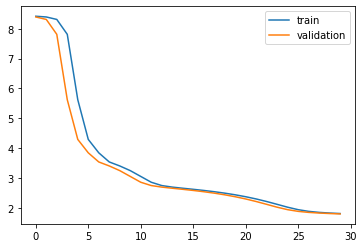

In [114]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train','validation'])
plt.show()

In [118]:
from keras.models import load_model
model = load_model('/content/model.h1.24_jan_19')

In [126]:
#preds = model.predict_classes(testX.reshape((testX.shape[0],testX.shape[1])))
predict_x=model.predict(testX) 
classes_x=np.argmax(predict_x,axis=1)

In [129]:
def get_word(n, tokenizer):
      for word, index in tokenizer.word_index.items():
          if index == n:
              return word
      return None

In [130]:
preds_text = []
for i in classes_x:
       temp = []
       for j in range(len(i)):
            t = get_word(i[j], eng_tokenizer)
            if j > 0:
                if (t == get_word(i[j-1], eng_tokenizer)) or (t == None):
                     temp.append('')
                else:
                     temp.append(t)
            else:
                   if(t == None):
                          temp.append('')
                   else:
                          temp.append(t) 
       preds_text.append(' '.join(temp))

In [131]:
pred_df = pd.DataFrame({'actual' : Y, 'predicted' : preds_text})

In [134]:
pred_df.sample(1)

actual                                          predicted
0  (E, n, g, l, i, s, h)  of  the    the  the   the    the   the  the   ...